<a href="https://colab.research.google.com/github/uccaoeo/Tutorials/blob/master/CORRELATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1    landOver25K_sqft       506 non-null    float64
 2   non-retailandProptn     506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrioxide+ppm          506 non-null    float64
 5   AvgNo.RoomsPerdwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   WeightedDist            506 non-null    float64
 8   radialHighwaysAccess    506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


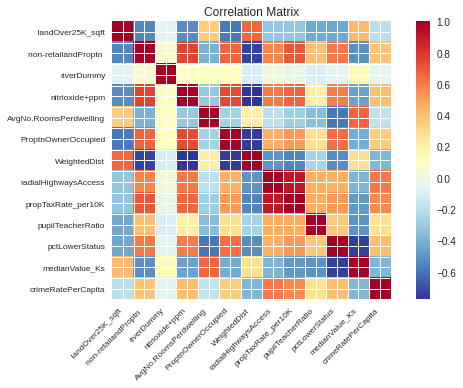

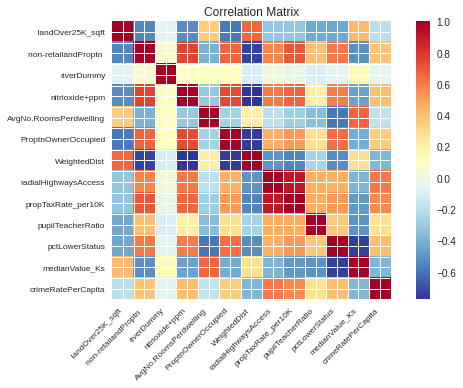

In [11]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
boston_data= pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')
boston_data = boston_data.dropna()  #Drop missing values to obtain a clean dataset
boston_data = boston_data.drop_duplicates() #check for and drop duplicate records in the dataset.
list(boston_data.columns)   #List the column names of the Dataframe.
renameboston_data= boston_data.rename(columns={'CRIM': 'crimeRatePerCapita', ' ZN ':' landOver25K_sqft', 'INDUS ':'non-retailandProptn ','CHAS':'riverDummy','NOX':'nitrioxide+ppm','RM':'AvgNo.RoomsPerdwelling','AGE':'ProptnOwnerOccupied','DIS':'WeightedDist','RAD':'radialHighwaysAccess','TAX':'propTaxRate_per10K','PTRATIO':'pupilTeacherRatio','LSTAT':'pctLowerStatus','MEDV':'medianValue_Ks'})
renameboston_data.head()
renameboston_data.info()   #inspect the datatypes of columns in your Dataframe, confirm there are no missing value.
renameboston_data.describe(include= [np.number]).T  #Use to calculate simple statistics of the Dataframe including count, mean, standard deviation, minimum, maximum, percentiles and what have you.
X = renameboston_data.drop('crimeRatePerCapita', axis=1)  # drop the dependent variable using the DROP function...drop crimeRateCapita
y = renameboston_data[['crimeRatePerCapita']]  #load the dependent variable into y....
seed = 10        # set seed
test_data_size = 0.3     #how much of your data do you want to test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =test_data_size, random_state=seed)  #split your data, train and test the model..Good Practise
train_data =pd.concat([X_train, y_train], axis = 1)   #train data set
test_data = pd.concat([X_test, y_train], axis = 1)   #test data set
corrMatrix = train_data.corr(method = 'pearson') #form a correlation
xnames =list(train_data.columns) #list the x axis variable which are the columns of the train data
ynames =list(train_data.columns) # list the y axis variable which are the columns of the train data
plot_corr(corrMatrix, xnames=xnames, ynames=ynames, title=None, normcolor=False, cmap='RdYlBu_r') #plot the correlation graph